# Machine Learning Basics

In [1]:
import torch
import os
import sys
sys.path.append(os.getcwd())

from neuralnetwork.mlp import *
from neuralnetwork.training import *

# Data Preparation

Labeled data is usually given in the form of pairs $(x,y)$ where $x$ is an input (for example, an image or a vector of numbers) and $y$ is the label which can refer to one of the different classes in our classification problem.

We will use the Iris dataset which is formed by 150 pairs of the form $(x,y)$ where $x$ is a four dimensional vector and $y$ can be either $0,1$ or $2$.

First, we randomly partition the whole data set into two sets: the training set (\~80%) and the test set (\~20%). 

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The training and test sets have to be chosen randomly and shuffled. We do this with the function `train_test_split`

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=53)

In [6]:
x_train[0]

array([5.9, 3.2, 4.8, 1.8])

In [7]:
y_train

array([1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2,
       1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0])

Only the train set is going to be used in the optimization process, also called the learning process. The test set is put aside to test the performance of our model after the optimization.

This data shuffling is used a lot in classical machine learning. In Quantum Machine Learning we usually use the whole dataset to compute one gradient, so it may not be useful.

# Model

We will use a classical neural network as a classification model for this example. 

<img src="mlp.png">

In [8]:
# Reproducibility
torch.manual_seed(2)

# Data
train_set, test_set, _ = get_iris_dataset()

# Neural net model
mlp = MLP(input_shape=4, num_classes=3)

In [9]:
output = mlp(torch.FloatTensor(x_train[0]))

print('Raw output: ', output)

Raw output:  tensor([0.4653, 1.5980, 0.3756], grad_fn=<SqueezeBackward3>)


The index with the maximum value of this tensor is called the $\textbf{prediction}$ of the model.

In [60]:
idx = 1
output = mlp(torch.FloatTensor(x_train[idx]))
print('Prediction: ', torch.argmax(output).item())
print('Actual label: ', y_train[idx])

Prediction:  1
Actual label:  2


In [11]:
get_accuracy(mlp, train_set)

0.45384615384615384

In [12]:
get_accuracy(mlp, test_set)

0.5

# Optimization

The model, in this case a classical neural network, depends on some parameters that we will denote by $\theta_1$, which are assigned randomly. One uses an optimization process that uses the data to obtain new parameters $\theta_2$. This process is iterative and for each choice of paramenters $\theta_i$ we may have a different performance of our model on the training and test sets.

The optimization process produces a sequence of paramenters $\theta_1,...,\theta_{30}$ that depend on different Hyperparameters. For example,

In [38]:
# Hyperparameters
iterations = 30
learning_rate = 0.0001
weight_decay = 0.01
momentum = 0.9

We will use Stochastic Gradient Descent (SGD) as an optimizer.

In [39]:
optimizer = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)
# Another hyperparameter is a Loss funciton. Which is a measure of how good the prediction is.
loss_fn = torch.nn.CrossEntropyLoss()

Once all this is set we run the optimization process and obtain the history of accuracies of the model.

In [40]:
train_acc, test_acc = train(network=mlp, train_set=train_set, optimizer=optimizer,
                            test_set=test_set, criterion=loss_fn, epochs=iterations)

100%|██████████| 30/30 [00:03<00:00,  8.17it/s]


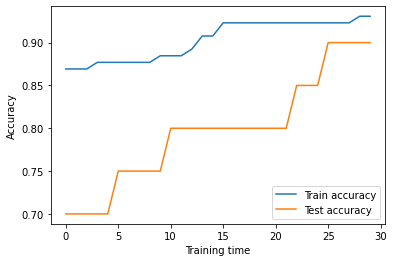

In [41]:
plot_accuracy(iterations, train_acc, test_acc)

When the test accuracy grows with respect to training time as well as the train accuracy we call it a $\textbf{learning process}$.

In [42]:
get_accuracy(mlp, train_set)

0.9307692307692308

In [43]:
get_accuracy(mlp, test_set)

0.9

# Hyperparameters

The optimization process is sensitive to the hyperparamenters. Even if we use the same model and optimization algorithn with different hyperparameters we could get a very different performance.

100%|██████████| 30/30 [00:05<00:00,  5.48it/s]


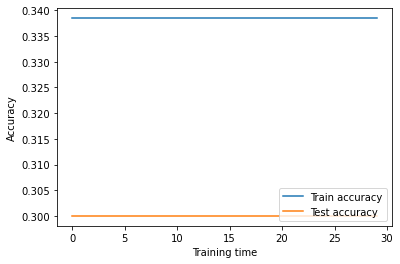

In [44]:
# Hyperparameters
iterations = 30
learning_rate = 0.01
weight_decay = 0.5
momentum = 0.6

mlp = MLP(input_shape=4, num_classes=3)

optimizer = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)

loss_fn = torch.nn.CrossEntropyLoss()

train_acc, test_acc = train(network=mlp, train_set=train_set, optimizer=optimizer,
                            test_set=test_set, criterion=loss_fn, epochs=iterations)

plot_accuracy(iterations, train_acc, test_acc)

100%|██████████| 10/10 [00:01<00:00,  8.22it/s]


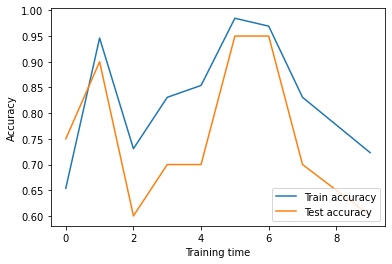

In [46]:
# Hyperparameters
iterations = 10
learning_rate = 0.001
weight_decay = 0.9
momentum = 0.9

mlp = MLP(input_shape=4, hidden_sizes=[1000,1000,500], num_classes=3)

optimizer = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)

loss_fn = torch.nn.CrossEntropyLoss()

train_acc, test_acc = train(network=mlp, train_set=train_set, optimizer=optimizer,
                            test_set=test_set, criterion=loss_fn, epochs=iterations)

plot_accuracy(iterations, train_acc, test_acc)

In [47]:
get_accuracy(mlp, train_set)

0.7230769230769231

In [48]:
get_accuracy(mlp, test_set)

0.6

## Overfitting and Underfitting

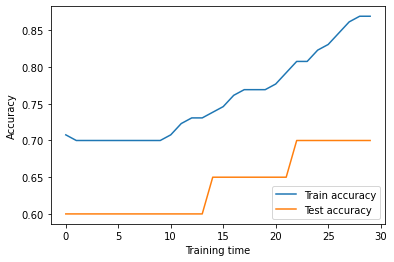

In [37]:
plot_accuracy(iterations, train_acc, test_acc)

We can see how the test accuracy is constant at training time 23 while train accuracy keeps increasing. We call this $\textbf{Overfitting}$. We can understand this as if the model is memorizing the training data on the optimization process.

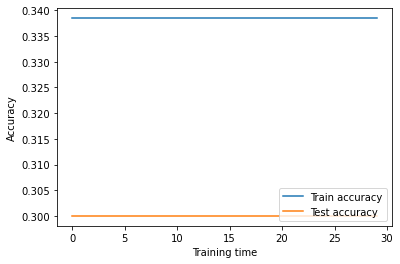

In [45]:
plot_accuracy(iterations, train_acc, test_acc)

When the model is unable to capture the features from the input data and neither the training accuracy nor the test accuracy grow we call it $\textbf{Underfitting}$.

# Hyperparameter tunning

We have to look for different choices of hyperparameters because they will give a model with unpredictable performance. There are different methods to do hyperparameter tunning. For example,

1) Grid search

2) Random search

3) Bayes optimization

4) Evolutionary optimization

We will see how to do a Grid search for hyperparameter tunning. This consists on seting values to try as hyperparameters and save the results

100%|██████████| 10/10 [00:00<00:00, 101.25it/s]


LR=0.0001, WD=0.01, MT=0.01, HS=[20, 20, 20]


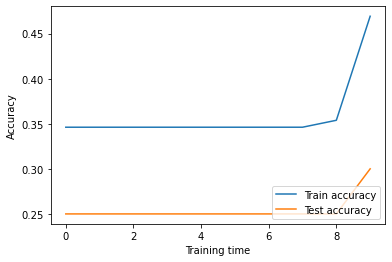

100%|██████████| 10/10 [00:00<00:00, 112.74it/s]


--------
LR=0.0001, WD=0.01, MT=0.01, HS=[100, 50, 20]


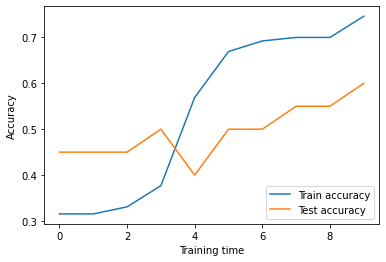

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 86.26it/s]


LR=0.0001, WD=0.01, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


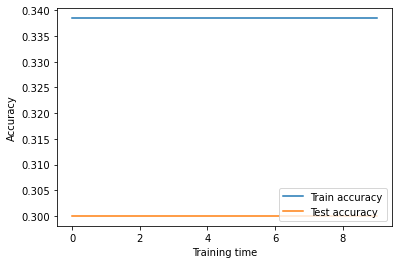

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 124.47it/s]


LR=0.0001, WD=0.01, MT=0.9, HS=[20, 20, 20]


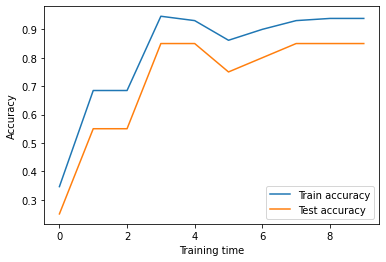

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 113.04it/s]


LR=0.0001, WD=0.01, MT=0.9, HS=[100, 50, 20]


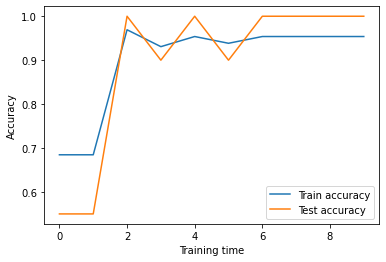

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 88.35it/s]


LR=0.0001, WD=0.01, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


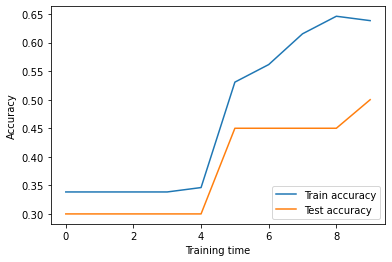

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 122.42it/s]


LR=0.0001, WD=0.1, MT=0.01, HS=[20, 20, 20]


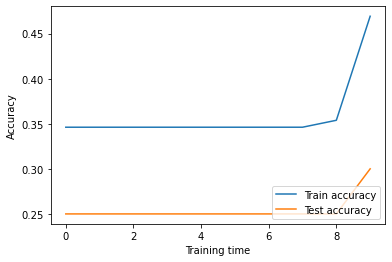

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 113.79it/s]


LR=0.0001, WD=0.1, MT=0.01, HS=[100, 50, 20]


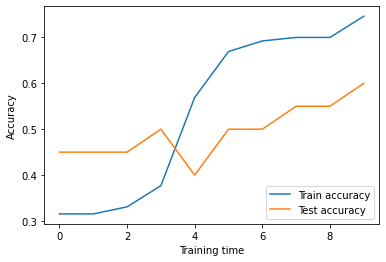

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 86.51it/s]


LR=0.0001, WD=0.1, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


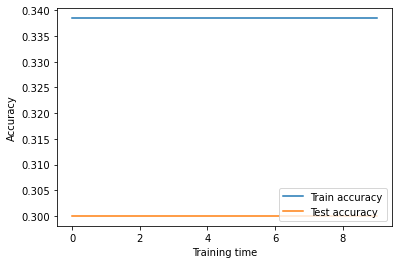

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 125.46it/s]


LR=0.0001, WD=0.1, MT=0.9, HS=[20, 20, 20]


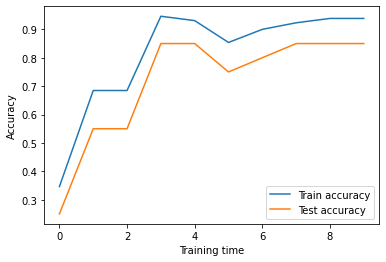

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 112.65it/s]


LR=0.0001, WD=0.1, MT=0.9, HS=[100, 50, 20]


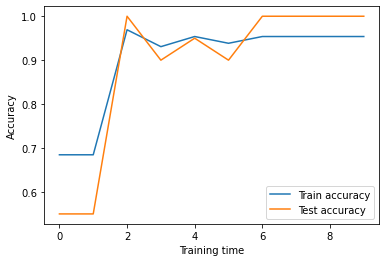

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 88.52it/s]


LR=0.0001, WD=0.1, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


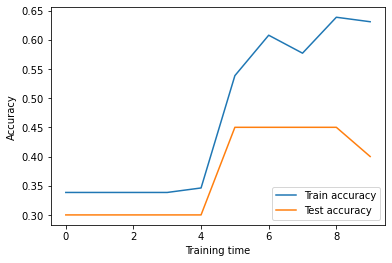

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 118.49it/s]


LR=0.0001, WD=0.9, MT=0.01, HS=[20, 20, 20]


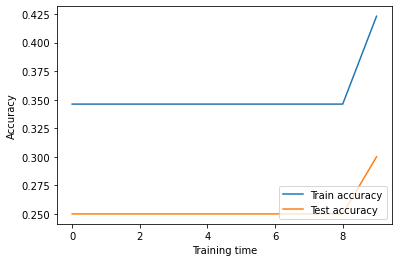

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 108.10it/s]


LR=0.0001, WD=0.9, MT=0.01, HS=[100, 50, 20]


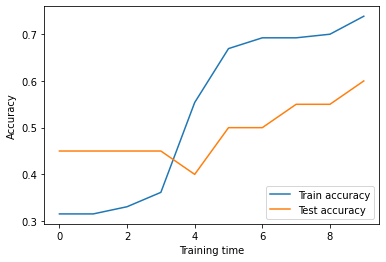

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 86.07it/s]


LR=0.0001, WD=0.9, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


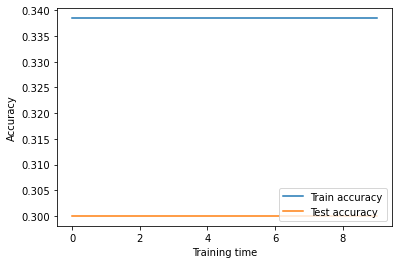

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 120.96it/s]


LR=0.0001, WD=0.9, MT=0.9, HS=[20, 20, 20]


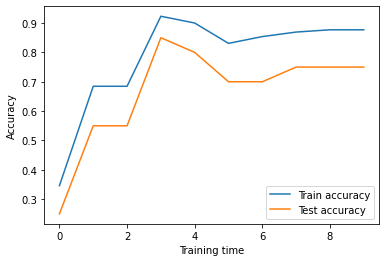

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 109.79it/s]


LR=0.0001, WD=0.9, MT=0.9, HS=[100, 50, 20]


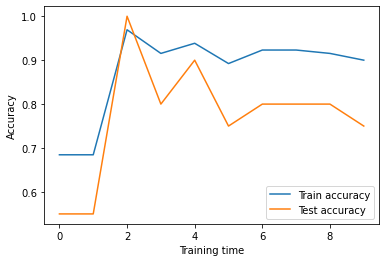

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 87.20it/s]


LR=0.0001, WD=0.9, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


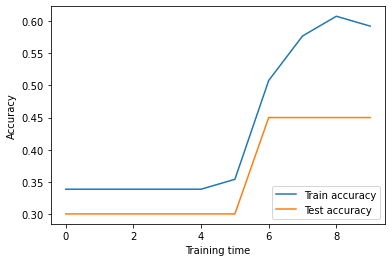

100%|██████████| 10/10 [00:00<00:00, 125.23it/s]


--------
LR=0.001, WD=0.01, MT=0.01, HS=[20, 20, 20]


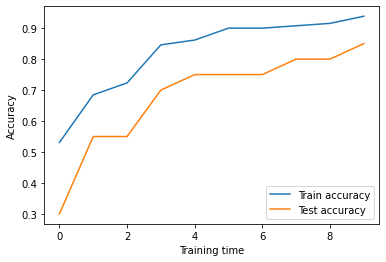

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 111.19it/s]


LR=0.001, WD=0.01, MT=0.01, HS=[100, 50, 20]


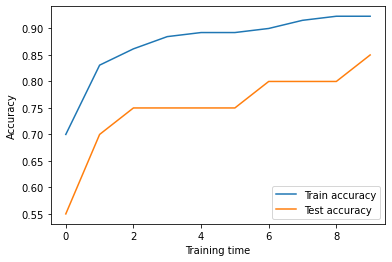

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 93.10it/s]


LR=0.001, WD=0.01, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


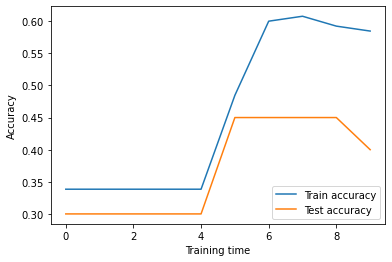

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 114.99it/s]


LR=0.001, WD=0.01, MT=0.9, HS=[20, 20, 20]


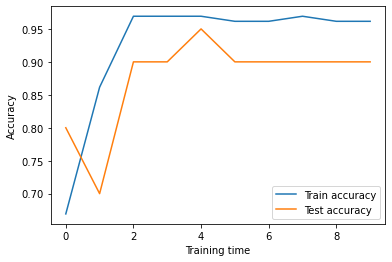

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 112.81it/s]


LR=0.001, WD=0.01, MT=0.9, HS=[100, 50, 20]


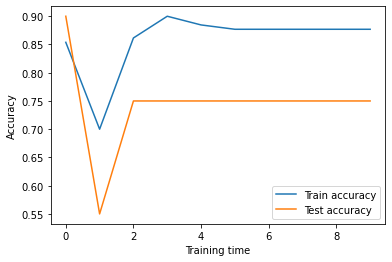

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 89.92it/s]


LR=0.001, WD=0.01, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


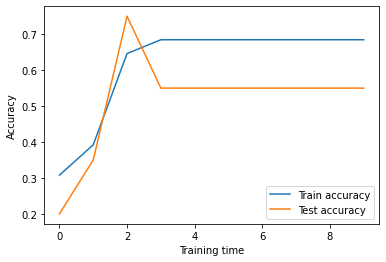

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 121.66it/s]


LR=0.001, WD=0.1, MT=0.01, HS=[20, 20, 20]


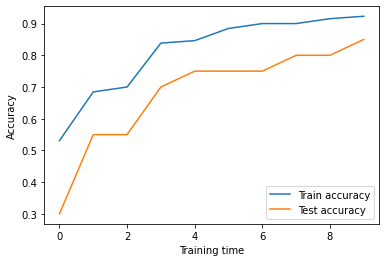

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 114.53it/s]


LR=0.001, WD=0.1, MT=0.01, HS=[100, 50, 20]


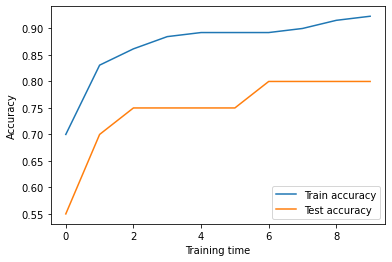

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 93.15it/s]


LR=0.001, WD=0.1, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


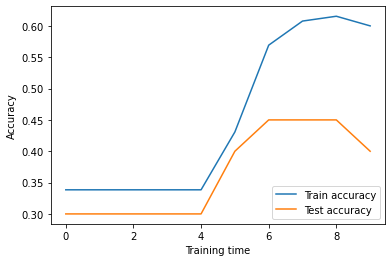

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 120.90it/s]


LR=0.001, WD=0.1, MT=0.9, HS=[20, 20, 20]


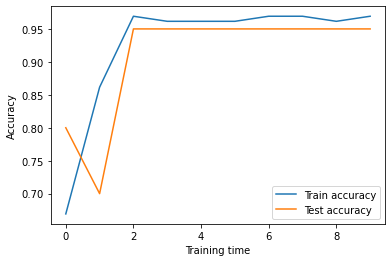

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 115.40it/s]


LR=0.001, WD=0.1, MT=0.9, HS=[100, 50, 20]


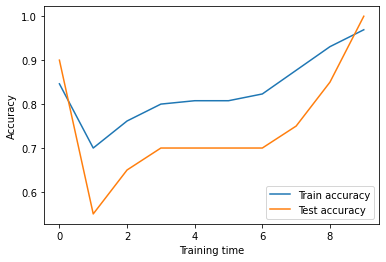

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 93.32it/s]


LR=0.001, WD=0.1, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


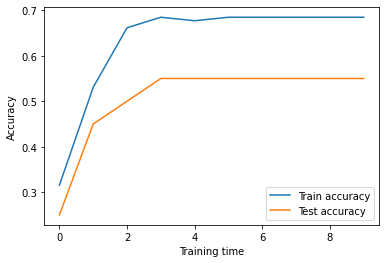

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 122.84it/s]


LR=0.001, WD=0.9, MT=0.01, HS=[20, 20, 20]


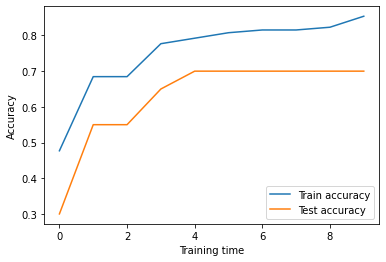

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 115.98it/s]


LR=0.001, WD=0.9, MT=0.01, HS=[100, 50, 20]


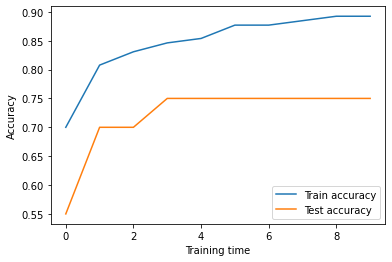

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 91.54it/s]


LR=0.001, WD=0.9, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


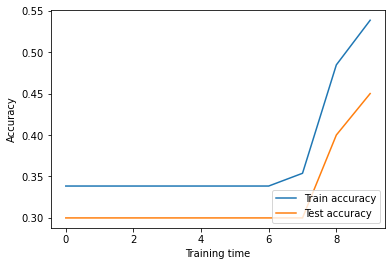

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 118.35it/s]


LR=0.001, WD=0.9, MT=0.9, HS=[20, 20, 20]


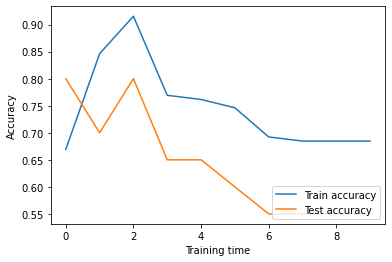

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 109.78it/s]


LR=0.001, WD=0.9, MT=0.9, HS=[100, 50, 20]


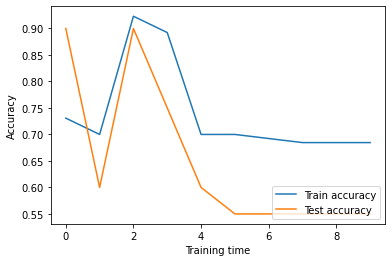

100%|██████████| 10/10 [00:00<00:00, 92.55it/s]


--------
LR=0.001, WD=0.9, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


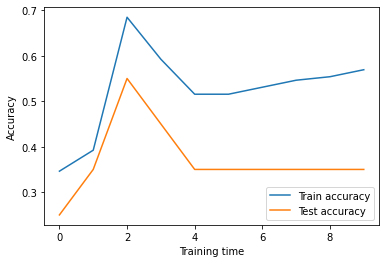

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 116.43it/s]


LR=0.01, WD=0.01, MT=0.01, HS=[20, 20, 20]


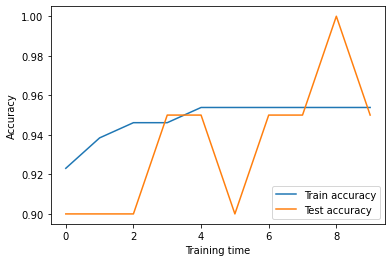

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 111.79it/s]


LR=0.01, WD=0.01, MT=0.01, HS=[100, 50, 20]


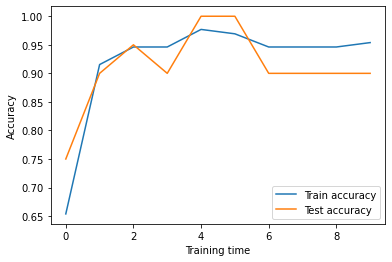

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 87.92it/s]


LR=0.01, WD=0.01, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


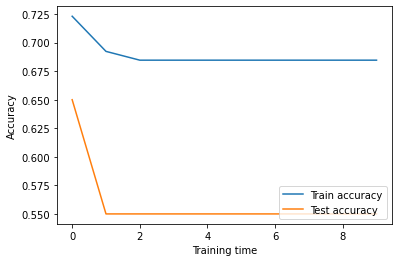

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 118.25it/s]


LR=0.01, WD=0.01, MT=0.9, HS=[20, 20, 20]


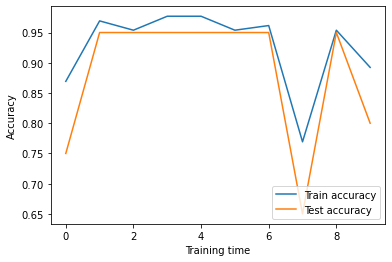

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 110.06it/s]


LR=0.01, WD=0.01, MT=0.9, HS=[100, 50, 20]


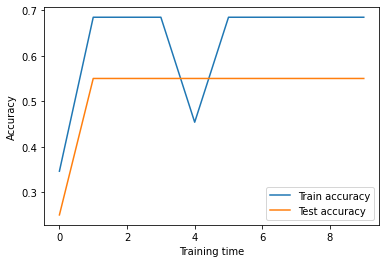

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 88.08it/s]


LR=0.01, WD=0.01, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


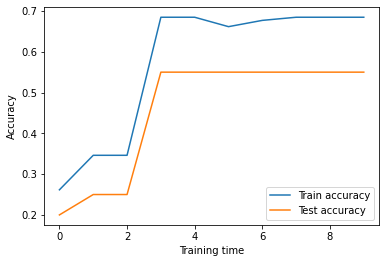

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 125.18it/s]


LR=0.01, WD=0.1, MT=0.01, HS=[20, 20, 20]


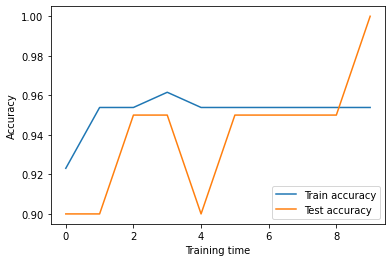

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 113.19it/s]


LR=0.01, WD=0.1, MT=0.01, HS=[100, 50, 20]


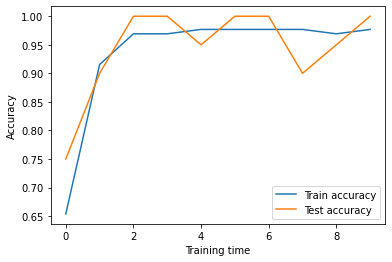

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 90.68it/s]


LR=0.01, WD=0.1, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


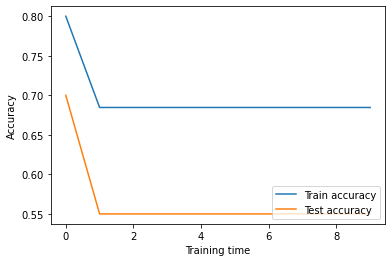

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 123.15it/s]


LR=0.01, WD=0.1, MT=0.9, HS=[20, 20, 20]


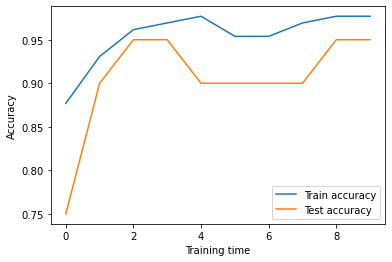

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 116.42it/s]


LR=0.01, WD=0.1, MT=0.9, HS=[100, 50, 20]


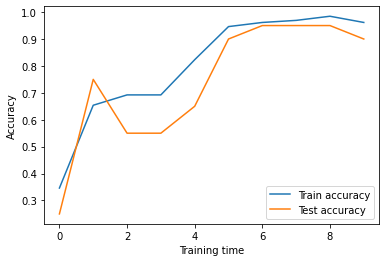

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 91.60it/s]


LR=0.01, WD=0.1, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


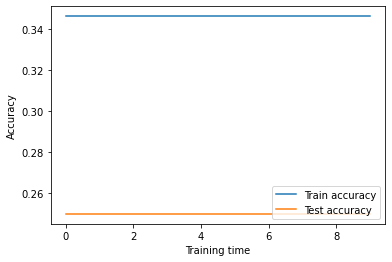

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 124.03it/s]


LR=0.01, WD=0.9, MT=0.01, HS=[20, 20, 20]


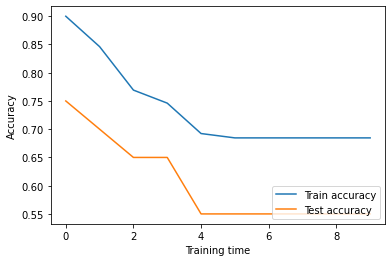

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 116.62it/s]


LR=0.01, WD=0.9, MT=0.01, HS=[100, 50, 20]


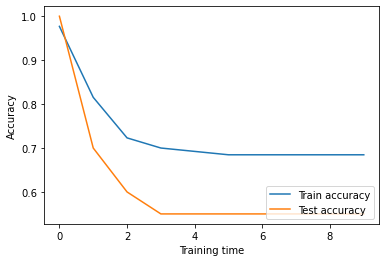

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 90.42it/s]


LR=0.01, WD=0.9, MT=0.01, HS=[10, 10, 10, 10, 10, 10]


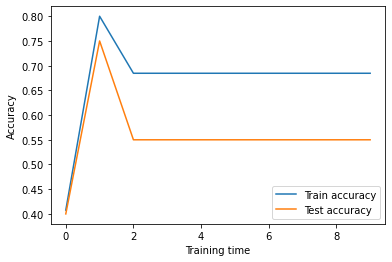

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 120.69it/s]


LR=0.01, WD=0.9, MT=0.9, HS=[20, 20, 20]


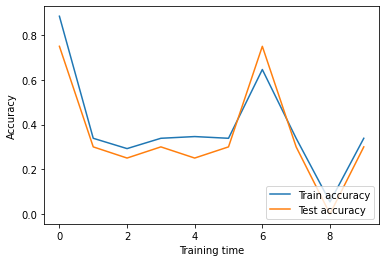

100%|██████████| 10/10 [00:00<00:00, 115.11it/s]


--------
LR=0.01, WD=0.9, MT=0.9, HS=[100, 50, 20]


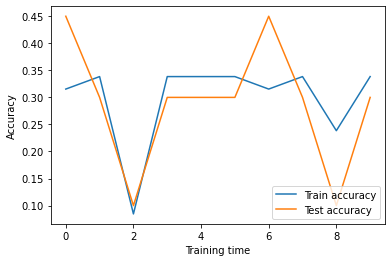

  0%|          | 0/10 [00:00<?, ?it/s]

--------


100%|██████████| 10/10 [00:00<00:00, 88.02it/s]


LR=0.01, WD=0.9, MT=0.9, HS=[10, 10, 10, 10, 10, 10]


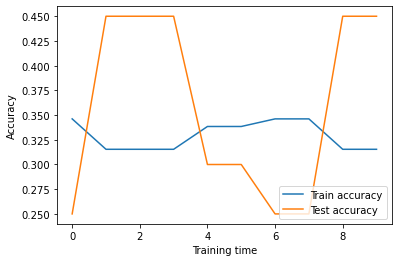

--------


In [57]:
learning_rates = [0.0001, 0.001, 0.01]
weight_decays = [0.01, 0.1, 0.9]
momentums = [0.01, 0.9]
hidden_sizes=[[20, 20, 20],
              [100, 50, 20],
              [10, 10, 10, 10, 10, 10]
             ]

for lr in learning_rates:
    for wd in weight_decays:
        for mt in momentums:
            for hds in hidden_sizes:
                torch.manual_seed(2)

                mlp = MLP(input_shape=4, hidden_sizes=hds.copy(), num_classes=3)
                optimizer = torch.optim.SGD(mlp.parameters(), lr=lr, weight_decay=wd, momentum=mt)

                loss_fn = torch.nn.CrossEntropyLoss()
                train_acc, test_acc = train(network=mlp, train_set=train_set, optimizer=optimizer,
                                            test_set=test_set, criterion=loss_fn, epochs=iterations)
                print(f'LR={lr}, WD={wd}, MT={mt}, HS={hds}')
                plot_accuracy(iterations, train_acc, test_acc)
                print('--------')

# COMPUTATIONAL RESOURCES



Training a ResNet150 for 100 iterations on the CIFAR10 data set (50,000 color images) can take approximately $\textbf{one hour and a half}$ with just one choice of hyperparameters. So if you want to try 3 different choices of 4 hyperparameters will take $\textbf{18 hours}$ in one GPU. Keep in mind that CIFAR10 is a small dataset compared to today's datasets.

1) Hyperparameter tunning is $\textbf{the reason}$ why we need so much computational resources to obtain state-of-the-art machine learning models. 

2) Only big companies and governments have access to such computational power. For example, Compute Canada gives access to Canadian researchers to computing resources of this level.

3) Quantum Machine Learning also suffers from the curse of hyperparameters which translates into quantum computational resources.

4) Checkpointing helps.